# DATA 601 - HW05
Due date: November 27, 2022, 23:59 pm

### Q1. (10 points)
Training and validation dataset: https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTraining.csv

* The last column of the HouseTraining.csv file lists price of 400 houses.
* There are 11 features
  * School rating (integer between 1 and 10)
  * House Area (sq ft)
  * Lot Area (sq ft)
  * Number of rooms
  * Number of bathrooms
  * Garage Yes:1, No: 0
  * Pool Yes:1, No: 0
  * Age of the House (years)
  * Walkability rating (something between 1 and 10)
  * Crime rate (something between 1 and 10)
  * Zipcode (Note that this is a fake data) 
  * House price ($)

Here are questions <br>
<b>1.1</b> Calculate the average crime rate for each zip code determine the zipcode with highest average crime rate? <br>
<b>1.2</b> Calculate the average house price for each zip code determine the zipcode with lowest average house price? Do you see a pattern? <br>
<b>1.3 </b> What feature has the strongest correlation with the "School_Rating" <br>
<b>1.4</b> Split your dataset into two (training 80\%, validation (testing) \%20, random_state=1). Build a multiple linear regression model to estimate the house price from all the other features we have and calculate the maximum relative error using $100*\mathrm{max}|(y_i-\hat{y}_i)/y_i|$ and $R^2$, where $y_i$ is the true value for the $i^{th}$ case in your testing data set and $\hat{y}_i$ is the prediction. <br>
<b>1.5</b> Download the new test dataset (https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTest.csv), guess the prices of these 10 houses featured in this dataset and print your predictions. Note that this dataset doesn't include "House_Price" column which was given in the training dataset.

## Q2. (10 points)

The Default data set of the ISLR2 package contains data about ten thousand customers. We know the balance of their bank account, their annual income and whether they are a student. You can download the dataset here: https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/Default.xlsx?raw=true'

Let's replace yes' and no's with 1's and 0's using the factorize() function. Note that factorize() returns two objects: a label array and an array with the unique values. We are only interested in the first object, i.e. <br>
<code>df = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/Default.xlsx?raw=true',index_col=[0]) </code> <br>
<code>df['default'] = df.default.factorize()[0]</code>  <br>
<code>df['student'] = df.student.factorize()[0]</code> <br>


Here the steps/questions you need to follow <br>
<b>2.1</b> Plot the histograms of the features in this dataset. What kinds of distributions do you see? <br>
<b>2.2</b> Boxplot 'default vs balance' and 'default vs income'. Which one has outliers? <br> 
<b>2.3</b> Split your dataset into two (training 80\%, validation (testing) \%20, random_state=1). Build a simple logistic regression model to predict default from balance feature only. Create the confusion matric and calculate accuracy, sensitivity, and specificity. <br> 
<b>2.4</b> Repeat 2.3 but this time use 'balance','income', and 'student' features to predict the default with a multiple logistic regression model. Create the confusion matric and calculate accuracy, sensitivity, and specificity.  <br>
<b>2.5</b> What does having a high sensitivity and a low specificity mean?<br>

In [13]:
df = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/Default.xlsx?raw=true',index_col=[0])

/Users/ergunsimsek/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


Let's replace yes' and no's with 1's and 0's using the  factorize() function.
Note that factorize() returns two objects: a label array and an array with the unique values. We are only interested in the first object.

In [15]:
df['default'] = df.default.factorize()[0]
df['student'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947


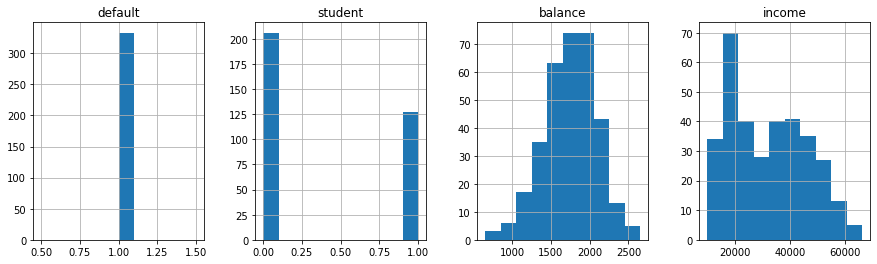

In [16]:
df[df.default == 1].hist(layout=(1,4),figsize=(15,4))
plt.show()

Text(0.5, 0, 'Balance')

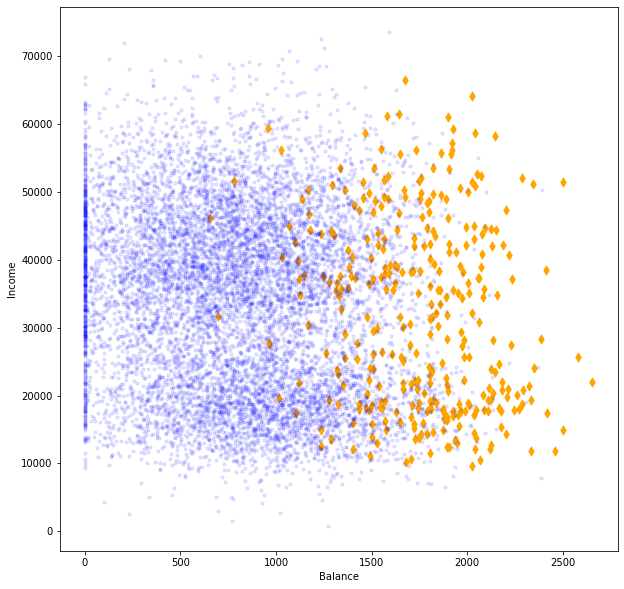

In [17]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df[df.default == 1].balance, df[df.default == 1].income, s=40, c='orange', marker='d',linewidths=1)
plt.scatter(df[df.default == 0].balance, df[df.default == 0].income, s=10, c='blue', marker='o',alpha = 0.1)
plt.ylabel('Income')
plt.xlabel('Balance')

/Users/ergunsimsek/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ergunsimsek/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='income'>

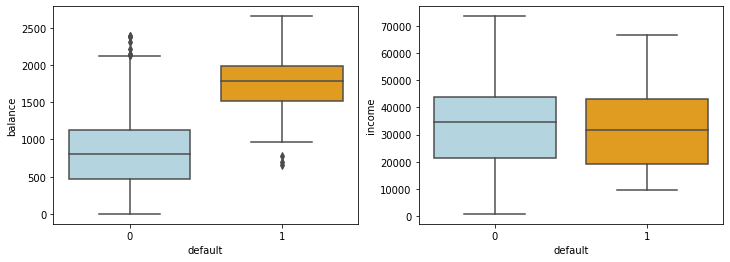

In [18]:
fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax1, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax2, palette=c_palette)

In [19]:
x = df.balance.values.reshape(-1,1) 
y = df.default.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)
logreg.score(X_test , y_test)

0.9745

In [20]:
#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[1930   11]
 [  40   19]]


In [21]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9745
Sensitivity :  0.994332818134982
Specificity :  0.3220338983050847


In [22]:
x = df.loc[:,['balance','income','student']].values
x[:,0] = x[:,0]/np.amax(x[:,0])
x[:,1] = x[:,1]/np.amax(x[:,1])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)
logreg.score(X_test , y_test)

0.9745

In [23]:
#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[1936    5]
 [  46   13]]


In [24]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9745
Sensitivity :  0.9974240082431737
Specificity :  0.22033898305084745
